<a href="https://colab.research.google.com/github/anishdulal/Linear-Regression/blob/master/AnalysisOnVegetablePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First, we import pandas and read Price.csv file and set it to a DataFrame called price. **

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!ls /content/gdrive/My\ Drive

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p= open('/content/gdrive/My Drive/Price.csv')
price1 = pd.read_csv(p)

In [0]:
#price1 = pd.read_csv('Price.csv')

Checking first five rows of the DataFrame.

price1.head()

In [0]:
#df2 = dfr[dfr['cdate'] == '02/25/2018']
#df3 = dfw[dfw['cdate'] == '02/25/2018']
#plt.scatter(df2['Avg'],df3['Avg'])

In [0]:
price = price1.rename(columns ={'कृषि उपज':'Name','ईकाइ':'Unit','न्यूनतम':'Min','अधिकतम':'Max','औसत':'Avg'}) #Renaming title of columns
price.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


In [0]:
def convert_value(column): #converting nepali numerical data into integers.
    r = []
    for i in column:
        #print(i)
        r.append(int(i))
    return r

price['Min'] = convert_value(price['Min'].tolist())
price['Max'] = convert_value(price['Max'].tolist())
price['Avg'] = convert_value(price['Avg'].tolist())
price.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W


In [0]:
import datetime

price['cdate']=pd.to_datetime(price['cdate'])
print(price.dtypes)

Name                 object
Unit                 object
Min                   int64
Max                   int64
Avg                   int64
cdate        datetime64[ns]
pricetype            object
dtype: object


In [0]:
dfw = price[price['pricetype'] == 'W']
dfr = price[price['pricetype'] == 'R']
dfw.info()
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49656 entries, 0 to 99216
Data columns (total 7 columns):
Name         49656 non-null object
Unit         49656 non-null object
Min          49656 non-null int64
Max          49656 non-null int64
Avg          49656 non-null int64
cdate        49656 non-null datetime64[ns]
pricetype    49656 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49646 entries, 68 to 99301
Data columns (total 7 columns):
Name         49646 non-null object
Unit         49646 non-null object
Min          49646 non-null int64
Max          49646 non-null int64
Avg          49646 non-null int64
cdate        49646 non-null datetime64[ns]
pricetype    49646 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.0+ MB


In [0]:
print(dfr[dfr['cdate'] == '02/25/2018'].info())
print(dfw[dfw['cdate'] == '02/25/2018'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 68 to 135
Data columns (total 7 columns):
Name         68 non-null object
Unit         68 non-null object
Min          68 non-null int64
Max          68 non-null int64
Avg          68 non-null int64
cdate        68 non-null datetime64[ns]
pricetype    68 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 7 columns):
Name         68 non-null object
Unit         68 non-null object
Min          68 non-null int64
Max          68 non-null int64
Avg          68 non-null int64
cdate        68 non-null datetime64[ns]
pricetype    68 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 4.2+ KB
None


** How many rows and columns are there? **

How many unique vegetables are there in the file?

In [0]:
#pd = price.groupby('Name').mean()
price['Name'].nunique()

120

In [0]:
keradf = dfr[dfr['Name'] == 'केरा']
keradf.head()

,Name,Unit,Min,Max,Avg,cdate,pricetype
114,केरा,दर्जन,80,90,85,2018-02-25,R
250,केरा,दर्जन,80,90,85,2018-02-26,R
383,केरा,दर्जन,80,90,85,2018-02-27,R
517,केरा,दर्जन,80,90,85,2018-02-28,R
651,केरा,दर्जन,80,90,85,2018-03-01,R


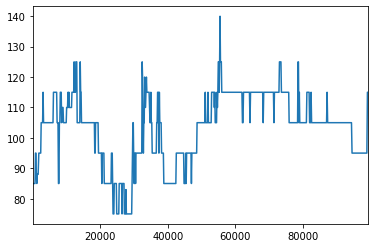

In [0]:
keradf['Avg'].plot.line()

In [0]:
keradf['Avg'].max()

140

In [0]:
price['Name'].value_counts()

मूला सेतो(लोकल)     1436
भुर्इ कटहर          1436
खु्र्सानी सुकेको    1436
काउली स्थानिय       1436
अदुवा               1436
                    ... 
अम्बा                 44
सजिवन                 32
अंगुर(कालो)           32
लीच्ची(भारतीय)        28
परवर(तराई)            16
Name: Name, Length: 120, dtype: int64

** What is the average retail Price for गोलभेडा ठूलो(नेपाली)? **

In [0]:
dfr[dfr['Name']=="गोलभेडा ठूलो(नेपाली)"]['Avg'].mean()

74.22967189728959

** What is the average wholesale Price for गोलभेडा ठूलो(नेपाली)? **

In [0]:
dfw[dfw['Name']=="गोलभेडा ठूलो(नेपाली)"]['Avg'].mean()

54.339971550497864

** What were the highest and lowest purchase prices for गोलभेडा ठूलो(नेपाली) in retail? **

In [0]:
dfr[dfr['Name']=="गोलभेडा ठूलो(नेपाली)"]['Max'].max()

190

In [0]:
dfr[dfr['Name']=="गोलभेडा ठूलो(नेपाली)"]['Min'].min()

40

** What are the five cheapest vegetables(retail)? **

In [0]:
dfr.sort_values(by = 'Avg')[:5]


,Name,Unit,Min,Max,Avg,cdate,pricetype
46938,बन्दा(लोकल),के.जी.,10,12,11,02/27/2019,R
37309,बन्दा(लोकल),के.जी.,10,15,12,12/17/2018,R
46940,मूला सेतो(लोकल),के.जी.,10,15,12,02/27/2019,R
46939,काउली स्थानिय,के.जी.,12,15,13,02/27/2019,R
37313,मूला सेतो(लोकल),के.जी.,15,20,17,12/17/2018,R


Categorize vegetables by name

In [0]:
dfr.groupby(by = 'Name').mean().head()

,Min,Max,Avg
Name,,,
अंगुर(कालो),281.875000,300.625000,291.250000
अंगुर(हरियो),163.931298,178.893130,171.412214
अदुवा,170.013947,187.775453,178.896792
अनार,224.678977,241.661932,233.178977
अम्बा,54.318182,63.863636,59.136364


# Visualization

The distplot shows the distribution of a univariate set of observations.

(0, 500)

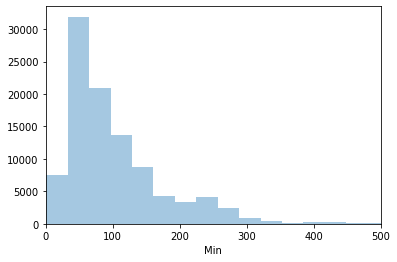

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.distplot(price['Min'], kde=False)
plt.xlim(0,500)

(50, 125)

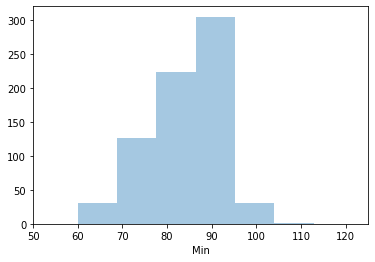

In [0]:
ab1 =price[(price['Name'] == 'केरा') & (price['pricetype']=='W')]
sns.distplot(ab1['Min'], kde = False)
plt.xlim(50,125)

In [0]:
#sns.jointplot(x,y='Min',data=price,kind='scatter')

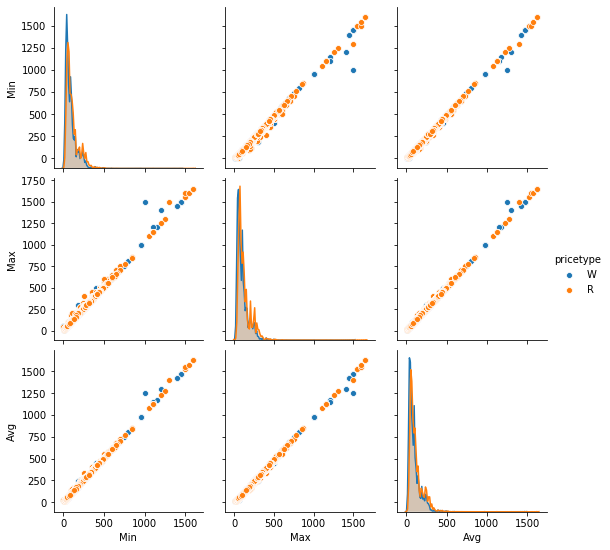

In [0]:
sns.pairplot(price, hue = 'pricetype')

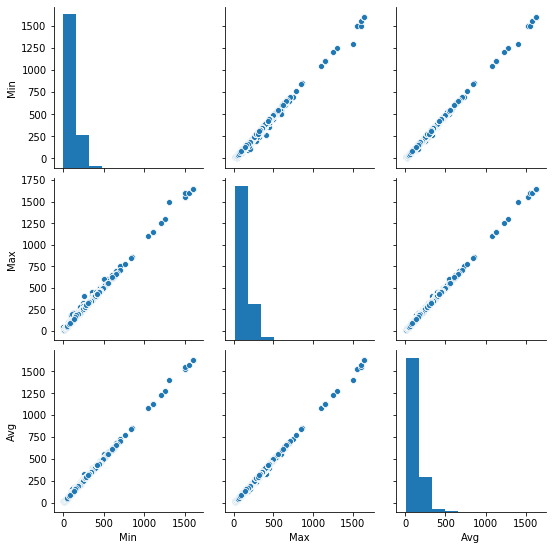

In [0]:
sns.pairplot(dfr)

In [0]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#sns.barplot(x= 'Name',y = 'Avg', data = dfr.iloc[:4])

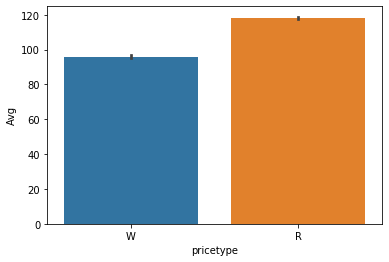

In [0]:
#plt.figure(figsize = (12,4))
sns.barplot(x= 'pricetype',y = 'Avg', data = price)

In [0]:
#dfr[['Max', 'Min', 'Avg']][:20].plot.area(alpha = 0.4)

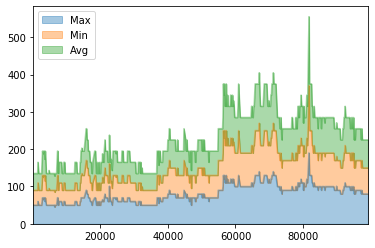

In [0]:
dfr[dfr['Name']=='गोलभेडा ठूलो(नेपाली)'][['Max', 'Min', 'Avg']].plot.area(alpha = 0.4)

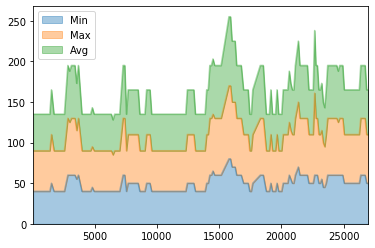

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)'][['Min','Max','Avg']][:200].plot.area(alpha = 0.4)

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)']['Max'].max()

190

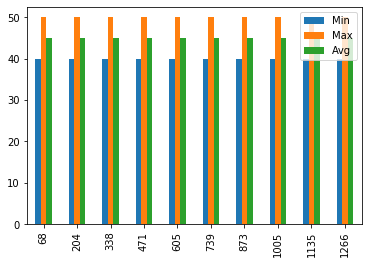

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)'][['Min','Max','Avg']][:10].plot.bar()

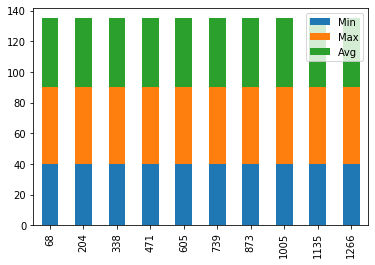

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)'][['Min','Max','Avg']][:10].plot.bar(stacked = True)

Text(0.5, 0, 'price')

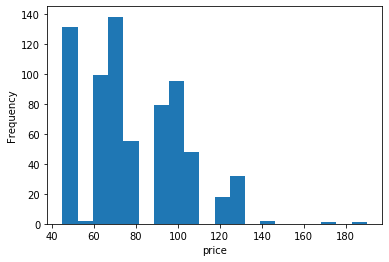

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)']['Max'].plot.hist(bins = 20)
plt.xlabel('price')

In [0]:
dfr['Max'].head()

68    50
69    50
70    40
71    35
72    70
Name: Max, dtype: int64

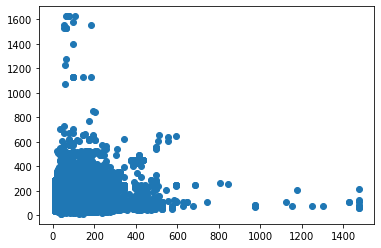

In [0]:
plt.scatter(x=price[price['pricetype'] == 'W']['Avg'].values[10:], y=price[price['pricetype'] == 'R']['Avg'].values)

In [0]:
price[price['pricetype'] == 'R']['Avg'].values

array([ 45,  45,  38, ..., 290, 290, 315])

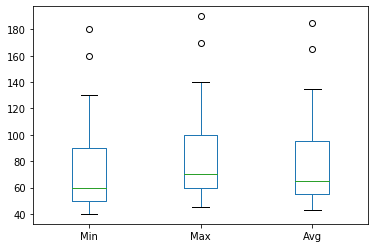

In [0]:
dfr[dfr['Name'] == 'गोलभेडा ठूलो(नेपाली)'].plot.box()


In [0]:
dfr.groupby('Name').mean().sort_values(by = 'Min')

,Min,Max,Avg
Name,,,
मूला रातो,31.845238,41.666667,36.761905
अालु सेतो,40.895327,48.674766,45.007477
मूला सेतो(लोकल),42.231520,51.966527,47.122734
बन्दा(लोकल),43.054393,52.715481,47.916318
फर्सी पाकेको,43.319209,53.213277,48.275424
...,...,...,...
कागती,286.947961,318.790436,302.872011
ताजा माछा(रहु),289.003831,299.386973,294.195402
कुरीलो,289.484536,304.742268,297.113402


In [0]:
dfr.groupby('Name').describe()

Min                          ...    Avg              
                       count        mean         std  ...    50%    75%    max
Name                                                  ...                     
अंगुर(कालो)             16.0  281.875000    5.439056  ...  290.0  290.0  305.0
अंगुर(हरियो)           262.0  163.931298   44.903078  ...  165.0  210.0  245.0
अदुवा                  717.0  170.013947   62.098429  ...  175.0  245.0  335.0
अनार                   704.0  224.678977   63.069239  ...  210.0  290.0  575.0
अम्बा                   22.0   54.318182    9.548804  ...   55.0   65.0   75.0
...                      ...         ...         ...  ...    ...    ...    ...
स्थानीय काउली(ज्यापु)   67.0   90.746269   25.543393  ...   85.0  115.0  145.0
स्याउ(झोले)            707.0  135.353607   41.109982  ...  125.0  145.0  245.0
स्याउ(फूजी)             87.0  352.873563   19.760664  ...  355.0  365.0  425.0
हरियो धनिया            711.0  163.199719  116.932903  ...  125.0  225.0  655.0
हरियो फर्सी(डल्लो)     253.0   70.395257   14.080336  ...   75.0   85.0  140.0

[120 rows x 24 columns]